In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 比較 Gradient Descent 使用 Adagrad 前後之差別
將權重與偏差值的軌跡畫出比較
===

In [4]:
#隨意產生10筆數據
x_data = [201., 323., 216., 456., 161., 874., 731., 113., 672., 910.]
y_data = [63., 99., 70., 156., 45., 340., 280., 33., 201., 373.]

$$Loss Function =\frac{1}{2}\sum_{k=0}^{n}(y-w*x_i-b)^2$$


In [6]:
#產生不同bias以及weights的Loss值
x = np.arange(-50,50,1) #bias
y = np.arange(-5,5,0.1) #weight
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  0.5*(y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

# Adagrad $$w^1\longleftarrow w^0 - \frac{\eta}{\sqrt{\sum_{k=0}^{n}(g^k)^2}+ϵ}$$
$$g^k =\frac{\partial L(\theta^k)}{\partial w}$$
---
ϵ : 避免分母為0
---

# 1 未使用Adagrad

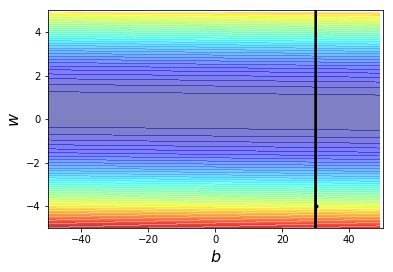

In [7]:
#初始化
b = 30 
w = -4
η = 0.0001
iteration = 10000

b_history = [b]
w_history = [w]

for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for j in range(len(x_data)):
        b_grad = b_grad + 0.5*2*(y_data[j] - w*x_data[j] - b)*(-1)
        w_grad = w_grad + 0.5*2*(y_data[j] - w*x_data[j] - b)*(-x_data[j])
    
    b = b - η* b_grad 
    w = w - η* w_grad    
    
    b_history.append(b)
    w_history.append(w)
                   
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot(b_history[-1], w_history[-1], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-50,50)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

# 結果:產生梯度爆炸

# 2 使用Adagrad

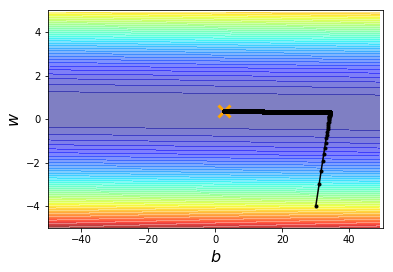

In [199]:
b = 30
w = -4
η = 1
iteration = 10000

b_lr = 0.0
w_lr = 0.0

b_history = [b]
w_history = [w]

for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for j in range(len(x_data)):
        b_grad = b_grad + 0.5*2*(y_data[j] - w*x_data[j] - b)*(-1)
        w_grad = w_grad + 0.5*2*(y_data[j] - w*x_data[j] - b)*(-x_data[j])
                   
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
                   
    b = b - η/np.sqrt(b_lr) * b_grad 
    w = w - η/np.sqrt(w_lr) * w_grad  
    
    b_history.append(b)
    w_history.append(w)
                   
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot(b_history[-1], w_history[-1], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-50,50)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

# 結果:明顯發現權重與偏差值有收斂

# 將回歸直線畫出

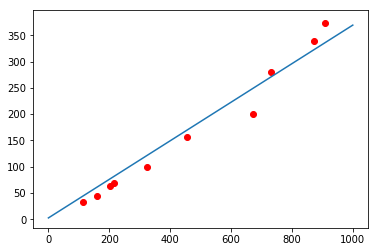

In [200]:
x = np.linspace(0,1000,1000)
plt.plot(x,w_history[-1]*x + b_history[-1])
plt.scatter(x_data,y_data, c='red')

# 結論
1.隨著迭代次數的增加，學習率會逐漸變小，有助於收斂
===
2.不同參數有者不同的學習率，有助於找到較佳的解
===
3.訓練後期由於迭代次數極大會使學習率趨近於0而無法跳出local minima
===